In [1]:
try:
    from utils import *
except ModuleNotFoundError:
    !wget https://raw.githubusercontent.com/dglee6257/Dataprocessing/main/utils.py -O ./utils.py
    from utils import *


df = read_excel("05_data1.xlsx")

In [2]:
new_column = new_column = ["gender", "weight", "height"]
new_df = df.loc[:, new_column]
new_df

,gender,weight,height
0,1,60,165
1,2,50,155
2,1,85,185
3,1,80,165
4,2,50,150
...,...,...,...
2995,2,55,155
2996,1,60,155
2997,1,60,165
2998,1,90,180


In [3]:
import seaborn as sns

In [4]:
df = read_csv("chap11_전복나이예측.csv")

In [5]:
df.loc[df["Group"] == 0.0, ["Group"]] = "year1"
df.loc[df["Group"] == 1.0, ["Group"]] = "year2"
df.loc[df["Group"] == 2.0, ["Group"]] = "year3"

In [6]:
df

,Diameter,Height,Whole_Weight,Viscra_Weight,Shell_Weight,Group
0,0.525,0.195,1.3700,0.2955,0.4070,year3
1,0.275,0.095,0.2170,0.0435,0.0900,year2
2,0.470,0.165,0.9975,0.2420,0.3300,year1
3,0.450,0.140,1.0130,0.2160,0.3600,year1
4,0.380,0.135,0.6810,0.1420,0.1700,year1
...,...,...,...,...,...,...
997,0.450,0.160,0.9980,0.2140,0.3010,year1
998,0.260,0.100,0.1920,0.0585,0.0700,year2
999,0.505,0.175,1.2075,0.2620,0.3900,year1
1000,0.300,0.105,0.3040,0.0610,0.0805,year2


Text(0.5, 1.0, 'Label')

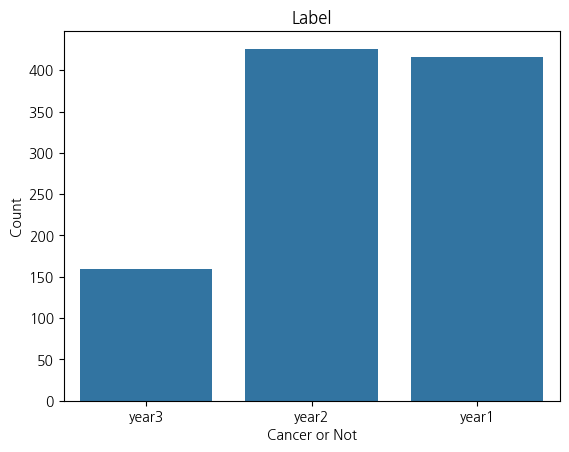

In [7]:
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Group")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Label")

In [8]:
year1_df = df.loc[df.Group == "year1", ["Diameter"]]
year2_df = df.loc[df.Group == "year2", ["Diameter"]]
year3_df = df.loc[df.Group == "year3", ["Diameter"]]

Text(0.5, 1.0, 'Diameter')

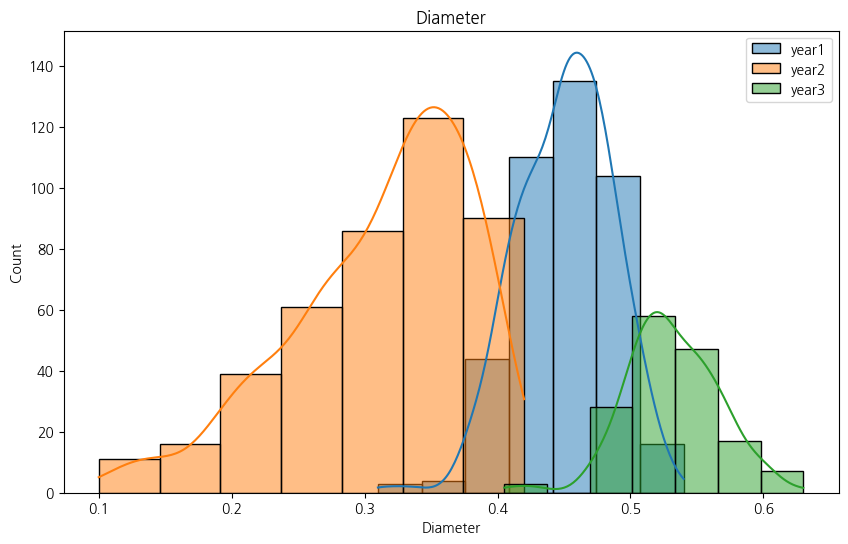

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(year1_df["Diameter"], bins=7, alpha=0.5, label="year1", kde=True)
sns.histplot(year2_df["Diameter"], bins=7, alpha=0.5, label="year2", kde=True)
sns.histplot(year3_df["Diameter"], bins=7, alpha=0.5, label="year3", kde=True)
plt.legend()
plt.title("Diameter")

<Axes: title={'center': 'seaborn swimbox'}, xlabel='Group', ylabel='Diameter'>

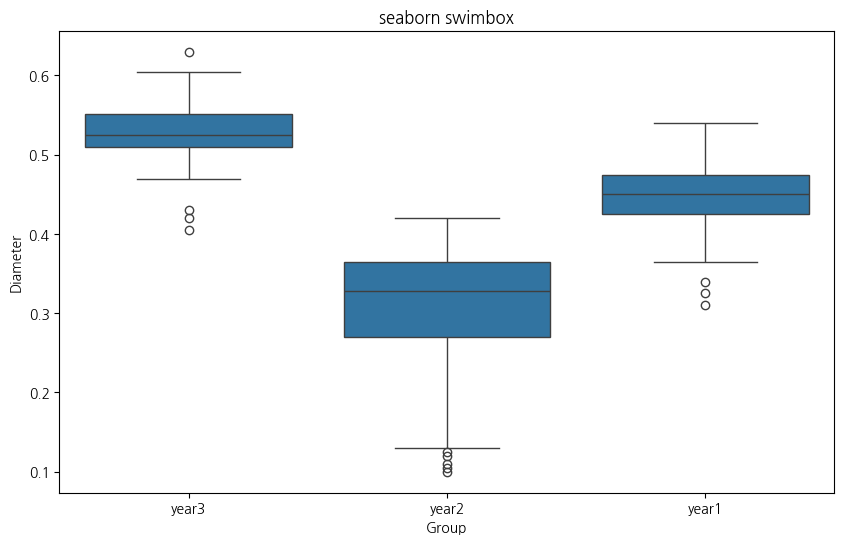

In [10]:
plt.figure(figsize=(10, 6))
plt.title("seaborn swimbox")
sns.boxplot(x="Group", y="Diameter", data=df)

<Axes: title={'center': 'seaborn swimbox'}, xlabel='Group', ylabel='Height'>

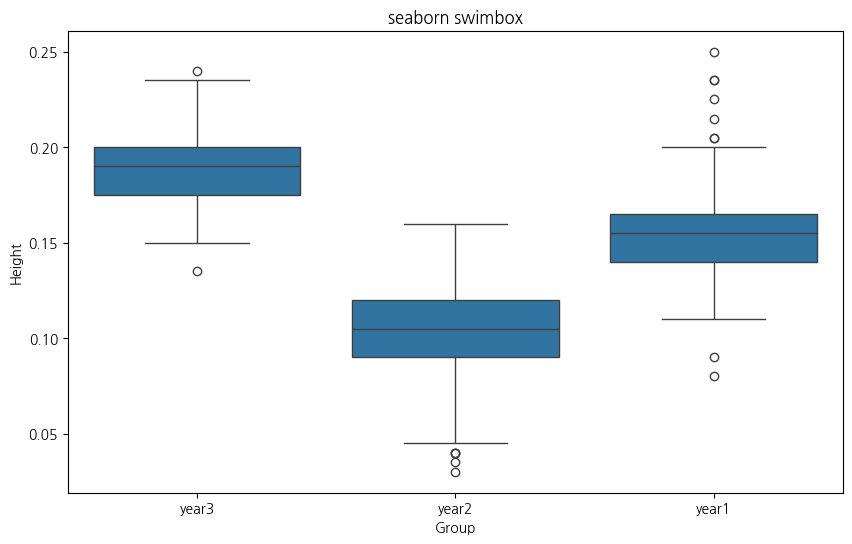

In [11]:
plt.figure(figsize=(10, 6))
plt.title("seaborn swimbox")
sns.boxplot(x="Group", y="Height", data=df)

<Axes: title={'center': 'violinplot'}, xlabel='Group', ylabel='Diameter'>

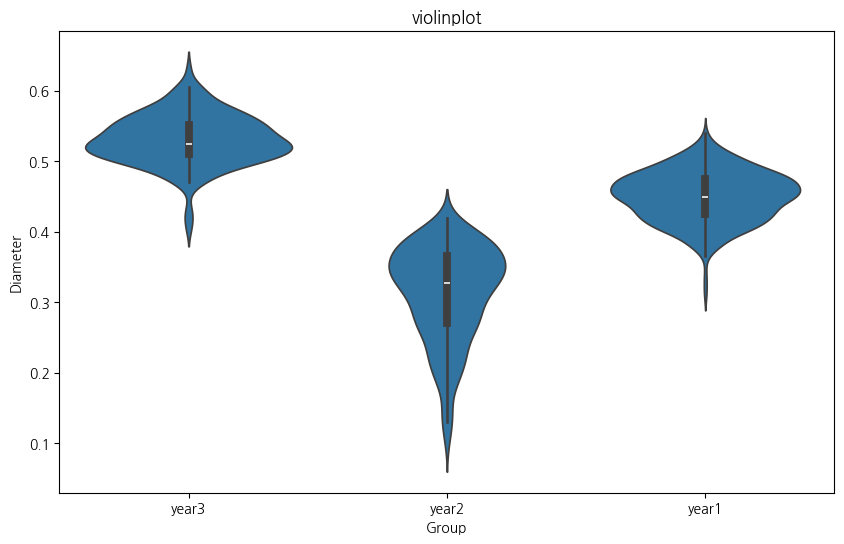

In [12]:
plt.figure(figsize=(10, 6))
plt.title("violinplot")
sns.violinplot(x="Group", y="Diameter", data=df)

<Axes: title={'center': 'violinplot'}, xlabel='Group', ylabel='Height'>

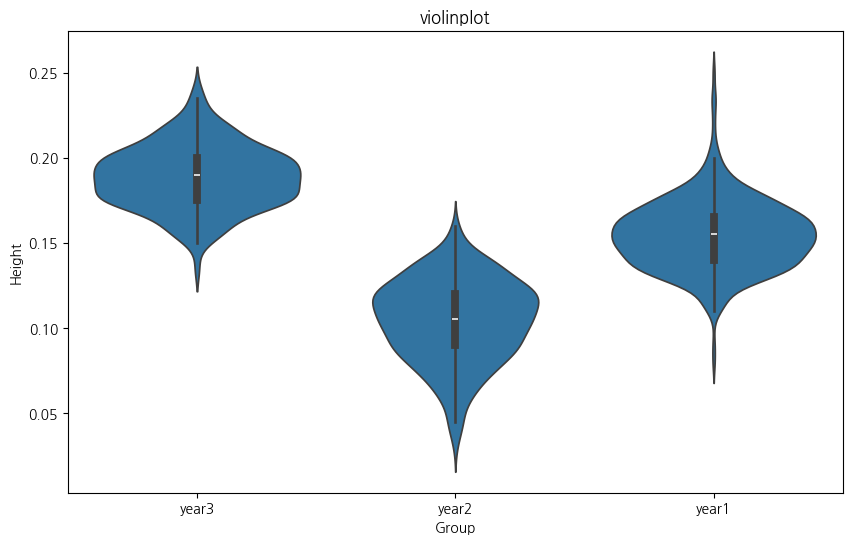

In [13]:
plt.figure(figsize=(10, 6))
plt.title("violinplot")
sns.violinplot(x="Group", y="Height", data=df)

<Axes: title={'center': '8x8Heat Map Graph'}>

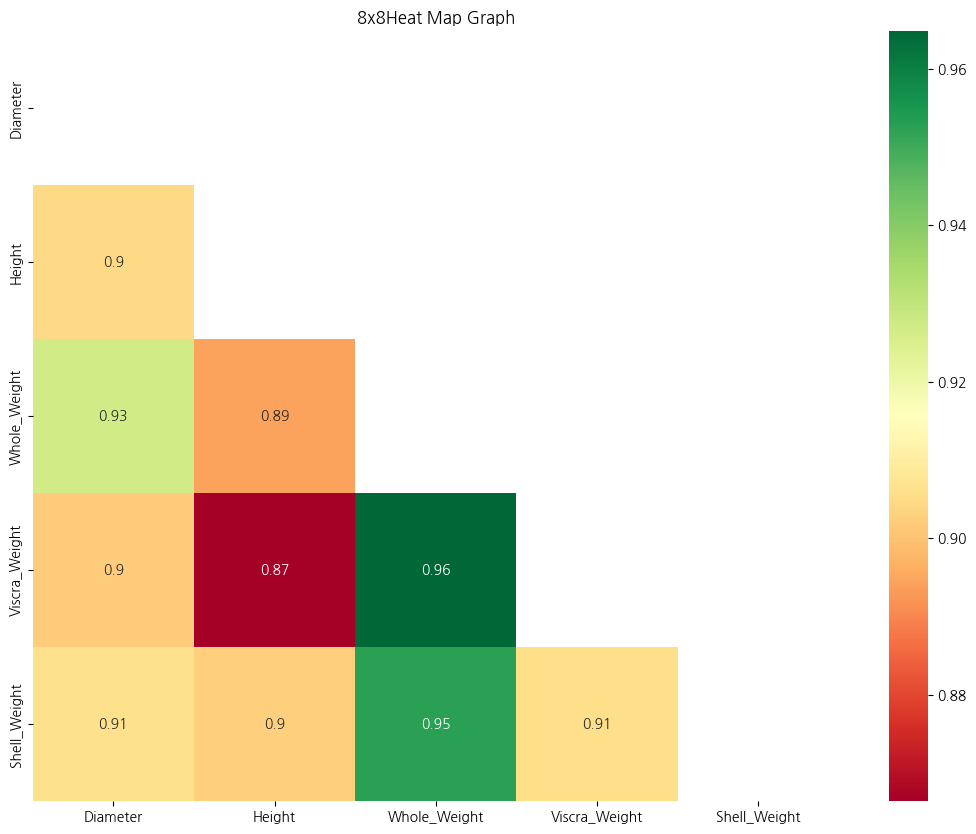

In [14]:
import numpy as np

plt.figure(figsize=(13, 10))
plt.title("8x8Heat Map Graph")
correlation_data8 = df.select_dtypes(include=np.number).corr()
upp_mat = np.triu(correlation_data8)
sns.heatmap(correlation_data8, annot=True, cmap="RdYlGn", mask=upp_mat)

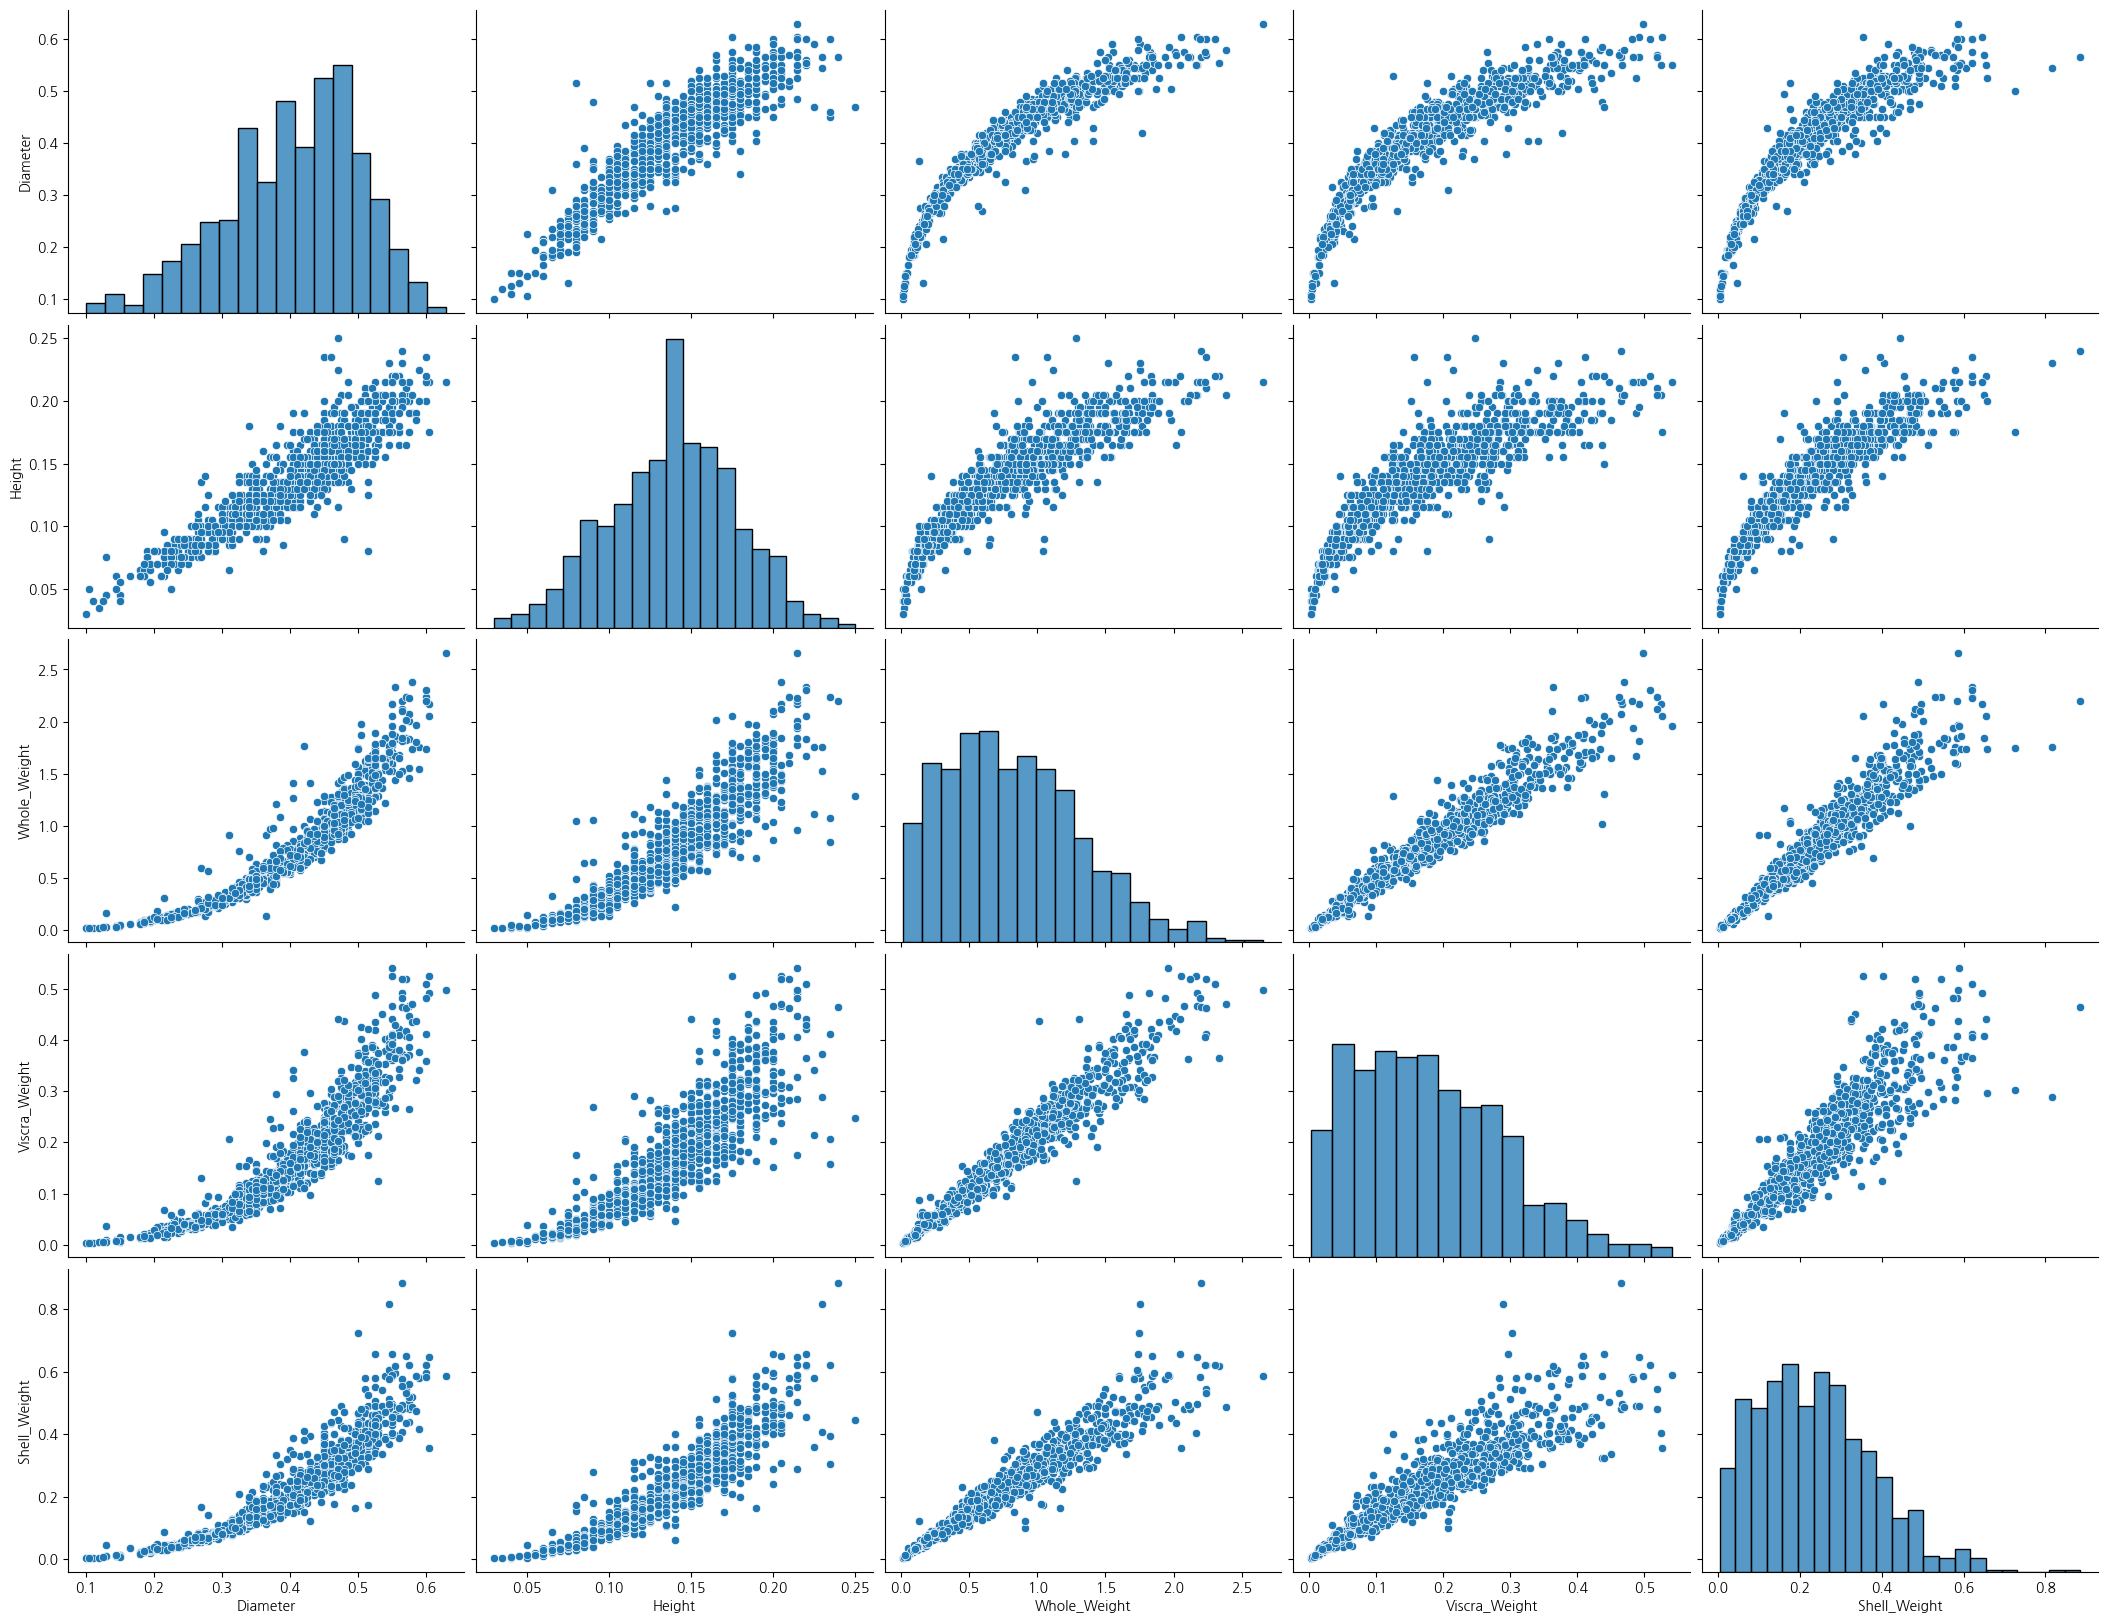

In [15]:
pp = sns.pairplot(df.select_dtypes(include=np.number), height=3.3, aspect=1.3)

In [16]:
new_column = ["Diameter", "Height", "Group"]
new_df = df.loc[:, new_column]
new_df

,Diameter,Height,Group
0,0.525,0.195,year3
1,0.275,0.095,year2
2,0.470,0.165,year1
3,0.450,0.140,year1
4,0.380,0.135,year1
...,...,...,...
997,0.450,0.160,year1
998,0.260,0.100,year2
999,0.505,0.175,year1
1000,0.300,0.105,year2


In [17]:
def bs(x):
    if x >= 0.4:
        return "BIG"
    else:
        return "SMALL"

In [18]:
new_df["Diameter"].apply(bs)

0         BIG
1       SMALL
2         BIG
3         BIG
4       SMALL
        ...  
997       BIG
998     SMALL
999       BIG
1000    SMALL
1001      BIG
Name: Diameter, Length: 1002, dtype: object

In [19]:
new_df["size"] = new_df["Diameter"].apply(lambda x: "BIG" if x >= 0.4 else "SMALL")

In [20]:
new_df

,Diameter,Height,Group,size
0,0.525,0.195,year3,BIG
1,0.275,0.095,year2,SMALL
2,0.470,0.165,year1,BIG
3,0.450,0.140,year1,BIG
4,0.380,0.135,year1,SMALL
...,...,...,...,...
997,0.450,0.160,year1,BIG
998,0.260,0.100,year2,SMALL
999,0.505,0.175,year1,BIG
1000,0.300,0.105,year2,SMALL


Text(0.5, 1.0, 'Count per size')

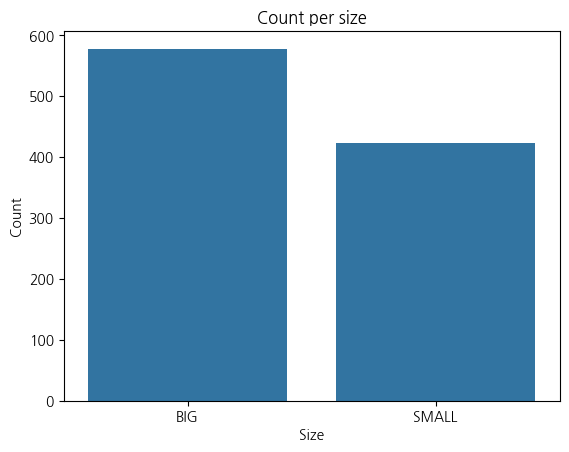

In [21]:
sns.countplot(data=new_df, x="size")
plt.xlabel("Size")
plt.ylabel("Count")
plt.title("Count per size")